In [1]:
import numpy as np

# simple intution behind MLE
def p(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*(sigma**2)) * np.exp(- (x - mu)**2 / (2*(sigma**2)))

x1 = 1
x2 = -1

mu_hat1 = 100
mu_hat2 = 0

p(x1, mu_hat1, sigma=1)*p(x2, mu_hat1, sigma=1) # Here, the pdf
# for two independent and identically distributed variables, i.e. x1 and x2,
# is computed

np.float64(0.0)

In [2]:
p(x1, mu_hat2, sigma=1)*p(x2, mu_hat2, sigma=1) # The same as above but for a
# different choice of parameters (mu in this case). Which parameter do you think
# are better?

np.float64(0.05854983152431917)

In [4]:
# Example of MLE using gradient descent
# Need to create a folder called "video_frames" in your working directory first
import autograd.numpy as np
from autograd.numpy import sqrt
from autograd import grad
import matplotlib.pyplot as plt

# generate a random sample from a Gaussian
np.random.seed(42)
n = 1000
mu = 2
sigma = 1
sample_data = np.random.normal(mu, sigma, n)

# define the gaussian negative log-likelihood (we'll talk about why use negative log momentarily)
def gaussian_ll(inputs):
    mu, sigma = inputs
    logL = -n/2 * np.log(2*np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((sample_data - mu)**2)
    # The command above correspond to the log of the Likelihood for a gaussian
    # which we have in the slides
    return -logL

# define the gradient for GD
gradient_gauss = grad(gaussian_ll) # here, the gradient is computed

# set up GD
eta = .001
epochs = 20
mu_gd = 0.0
sigma_gd = 2.0
params_gd = np.array([mu_gd, sigma_gd])

for i in range(epochs):
    dfd = gradient_gauss(params_gd)
    params_gd = params_gd - eta*dfd # Here the parameters are updated via GD
    [mu_gd, sigma_gd] = params_gd
    plt.hist(sample_data, bins=50, density=True, color='skyblue', edgecolor='black')

    x = np.linspace(-3, 7, 1000)
    y = p(x, mu_gd, sigma_gd) # Here the Gaussian for the best parameters is computed
    plt.plot(x, y, color='red', linewidth=2)

    plt.title('Normal Distribution MLE')
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.clf()
# plt.clf() removes all existing plots, axes, and labels from the current figure.
# It does not close the figure window; it just resets it.
# It allows reusing the same figure object without creating a new one.


<Figure size 640x480 with 0 Axes>

In [5]:
# Check the folder and cycle through to see how GD is working
# Then, check the "final" MLEs
print(f'The final estimates of mu: {mu_gd}, and sigma: {sigma_gd}')

The final estimates of mu: 2.0193320558223253, and sigma: 1.004090987100684


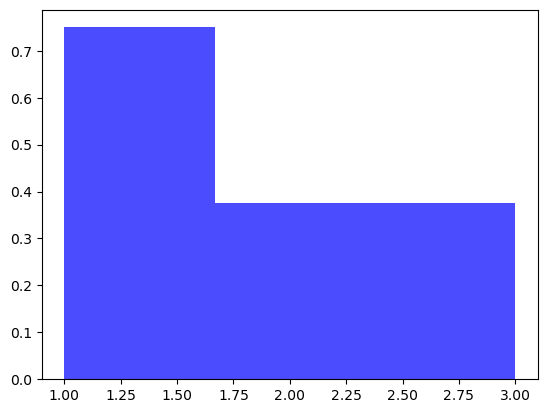

In [6]:
# KDE example
# First, get some silly sample data
x_dat = np.array([1, 1, 2, 3])
plt.hist(x_dat, 3, facecolor='blue', alpha=.7, density = True)
plt.show()

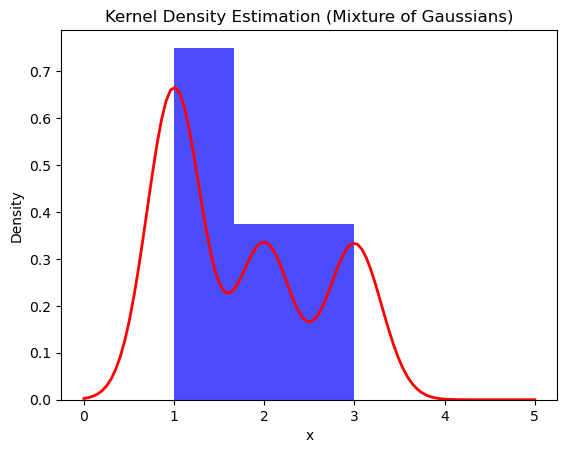

In [7]:
# Pick a sigma (experiment with this; for this simple example, try .2, .3, .5, 1)
sigma_kde = .3

# generate x-axis values for KDE plot
x = np.linspace(0, 5, 100)

# compute the KDE values for the mixture of Gaussians
# should try to find a way to make this generalized for any number
pdf_kde = (1/4)*(p(x, mu=x_dat[0], sigma=sigma_kde) + # A new gaussian is computed
                 p(x, mu=x_dat[1], sigma=sigma_kde) +
                 p(x, mu=x_dat[2], sigma=sigma_kde) +
                 p(x, mu=x_dat[3], sigma=sigma_kde))

# plot the KDE of the mixture distribution
plt.hist(x_dat, int(1/sigma_kde), facecolor='blue', density=True, alpha=.7)
# int(1/sigma_kde) used to determine how many bins
plt.plot(x, pdf_kde, 'r-', linewidth=2)

plt.title('Kernel Density Estimation (Mixture of Gaussians)')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

In [8]:
# Practice with the Getting to Know You Numeric Data
import pandas as pd
gtky = pd.read_csv('numonly_gtky.csv', header = None, names = ['credit','work'])
gtky.head()

,credit,work
0,17,12
1,17,0
2,17,15
3,16,3
4,16,0


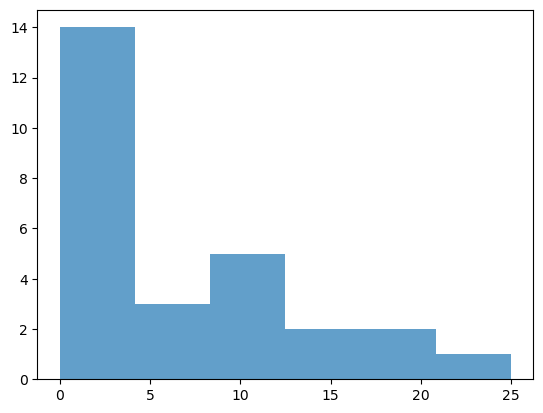

In [9]:
work_hours = np.array(gtky.work) # Extracting work_hours from the dataset
n, bins, patches = plt.hist(work_hours, 6, alpha=.7)
plt.show()

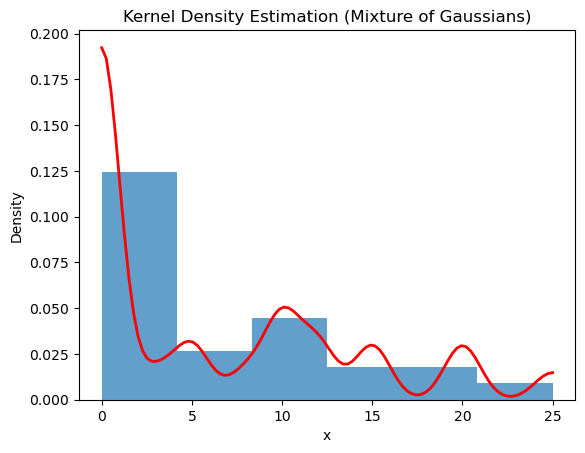

In [10]:
# Pick a sigma (experiment with this; less than 1 probably too granular, try a few larger values)
sigma_kde = 1 # Look in the slides: sometimes you can use methods to approximate this
# value, like the Silverman's rule

# generate x-axis values for KDE plot
x = np.linspace(0, 25, 100)

# compute the KDE values for the mixture of Gaussians
def kde_gauss(x_list, data, sigma_kde):
    n = len(data)
    mixture = 0
    for i in range(n):
        mixture += p(x_list, mu=data[i], sigma=sigma_kde)

    return (1/n)*mixture

pdf_kde = kde_gauss(x, work_hours, sigma_kde) # kde_gauss computes a KDE using a
# mixture of gaussians

# plot the KDE of the mixture distribution
plt.hist(work_hours, 6, density=True, alpha=.7)
plt.plot(x, pdf_kde, 'r-', linewidth=2)

plt.title('Kernel Density Estimation (Mixture of Gaussians)')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

In [12]:
# We did the MLE last class using the closed form solution:
# To estimate the distribution, estimate lambda (or, theta, like in the notes, which is the inverse of the mean)
lambda_hat = 1 / work_hours.mean() # Here, we will compute the closed-form of the MLE for exponential PDF.

lambda_hat

np.float64(0.1588235294117647)

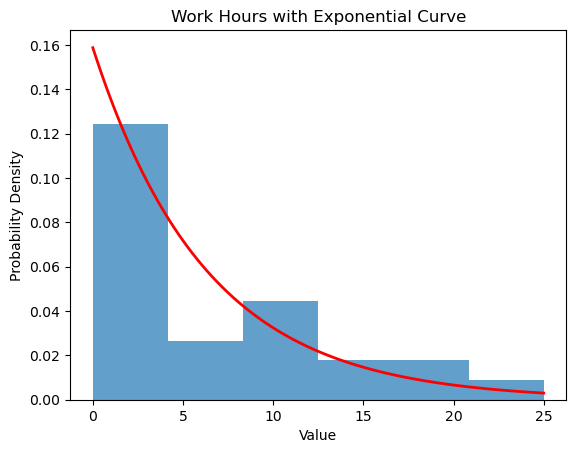

In [13]:
from scipy.stats import expon

plt.hist(work_hours, bins=6, density=True, alpha=.7);
x_expon = np.linspace(0, 25, 100)
y_expon = expon.pdf(x_expon, scale = 1/lambda_hat)
plt.plot(x_expon, y_expon, color='red', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Work Hours with Exponential Curve')
plt.show()

In [15]:
# Using gradient descent
# Create another video_frames2 folder
n = len(work_hours)

# define the exponential negative log-likelihood
def expon_ll(lam):
    logL = n*np.log(lam) - np.sum(lam * work_hours) # Here we define the log Likelihood
    # of the exponential function, and use that to do GD.
    return -logL

# define the gradient for GD
gradient_expon = grad(expon_ll)

# set up GD
eta = .001
epochs = 20
lam_gd = 1.0

for i in range(epochs):
    dfd = gradient_expon(lam_gd)
    lam_gd = lam_gd - eta*dfd

    plt.hist(work_hours, bins=6, density=True, color='skyblue', edgecolor='black')

    x = np.linspace(0, 25, 100)
    y = expon.pdf(x, scale = 1/lam_gd)
    plt.plot(x, y, color='red', linewidth=2)

    plt.title('Exponential Distribution MLE')
    plt.xlabel('Work Hours')
    plt.ylabel('Density')
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [16]:
# Check the folder and cycle through to see how GD is working
# Then, check the "final" MLE
print(f'The final estimate of lambda: {lam_gd}')

The final estimate of lambda: 0.15882352941176472


In [17]:
# What about the Gaussian MLE for Work Hours?
# What about Credit Hours?

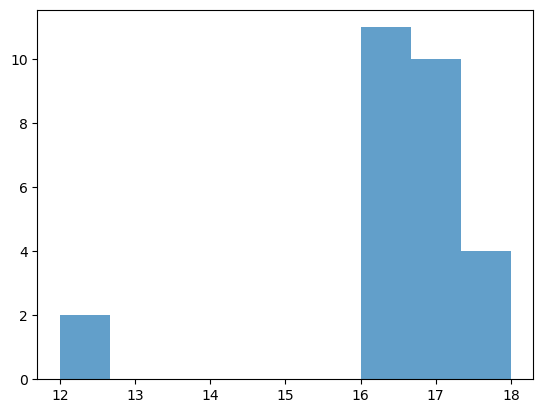

In [18]:
# Repeat the steps above, that's KDE for Gaussian, MLE closed-form for exponential
# and GD minimization for exponential logL
credit_hours = np.array(gtky.credit)
n, bins, patches = plt.hist(credit_hours, 9, alpha=.7)
plt.show()